# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [10]:
#we begin by importing required libraries for our work
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [11]:
#'twitter-archive-enhanced.csv was given to us, so we put it to use on a dataframe
df_twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [12]:
#image_predictions uses a url, so we need to use request library to get it, write to file and load it to a dataframe
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
print(response)

<Response [200]>


In [13]:
#we open a file to write content of img.tsv
with open('img.tsv','wb')as file:
    file.write(response.content)

In [14]:
#we load img.tsv we saved to a dataframe called df_img
df_img=pd.read_csv('img.tsv',sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [15]:
#we created an  empty list and  a new file , and looped through line by line, put it in a data variable and appended it to our
#empty tweet_list using append.
tweet_list=[]
with open('tweet-json.txt','r')as file:
    for line in file:
        data=json.loads(line)
        tweet_list.append(data)

In [16]:
#tweet_list.keys gives us the names of our keys (like columns), so we can select the needed ones based on project criteria
tweet_list[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [17]:
#we load tweet_list to a dataframe by selecting the columns id, re
tweet_json=pd.DataFrame(tweet_list, columns={'id','retweet_count','favorite_count'})

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [18]:
#Visual assessment of twitter_archive_enhanced.csv
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### visual assessment of twitter_archive_enhanced.csv
#### Quality issue 
- in_reply_to_status_id column has many empty (NaN) values
- in_reply_to_user_id also has many empty(NaN) values
- source contains url
- retweeted_status_id has many NaN
- retweeted_status_user_id has many NaN
- retweeted_status_timestamp has many NaN
- Denominator is a constant whose column should be dropped(No any value keeping it)

#### Tidiness
- Stages of dogs as described in prooject overview as in doggo, floofer,paupper and puppo disobey the tidyness rule, 

In [19]:
#programmatic assessment of twitter_archive_enhanced.csv
#we have 2356 entries with 17 columns total
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
#using value counts on columns and this shows 4 categories of sources
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Visual and programmatic assessment summary of twitter_archive_enhanced.csv
- 1. Timestamp is object and should be datetime
- 2. in_reply_to_status_id has only 78 non-null values
- 3. in_reply_to_user_id has only 78 non-null values
- 4. retweeted_status_id has only 181 non-null values
- 5. retweeted_status_timestamp has only 181 non-null values
- 6. retweeted_status_user_id has only 181 non-null values
- 7. source has anchor tags along with content and that needs to be extracted 

#### Tidiness
- 1. columns doggo, floofer, pupper and puppo disobey Tidiness rule and should be under one column say dog_stages
- 2. columns above should be dropped from the twitter archive enhanced dataset
- 3. columns in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id should be dropped

## Visual and programmatic assessment summary of Image_Prediction dataset 
#### Quality 
- 8. Not all images/predictions are dogs (False on p1_dog, p2_dog,p3_dog)
#### Tidiness
- 4. p1,p1_conf,p1_dog, p2,p2_conf,p2_dog	,p3,p3_conf,p3_dog disobey tidiness rule and should be in two colums, breed and prediction
- 5. columns p1,p1_conf,p1_dog, p2,p2_conf,p2_dog	,p3,p3_conf,p3_dog should be droppped

In [22]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [23]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
tweet_json

,retweet_count,favorite_count,id
0,8853,39467,892420643555336193
1,6514,33819,892177421306343426
2,4328,25461,891815181378084864
3,8964,42908,891689557279858688
4,9774,41048,891327558926688256
5,3261,20562,891087950875897856
6,2158,12041,890971913173991426
7,16716,56848,890729181411237888
8,4429,28226,890609185150312448
9,7711,32467,890240255349198849


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
df_twitter_archive_clean=df_twitter_archive.copy()
df_img_clean=df_img.copy()
tweet_json_clean=tweet_json.copy()

### Issue #1: Timestamp is object and should be datetime

#### Define: convert timestamp to datetime using str

#### Code

In [26]:
#Converting timestamp to date
df_twitter_archive_clean["timestamp"] = pd.to_datetime(df_twitter_archive_clean["timestamp"])

#### Test

In [27]:
#Testing timestamp coversion from object to datetime using dytpe
df_twitter_archive_clean.timestamp.dtype

dtype('<M8[ns]')

### Issue #2: in_reply_to_status_id has only 78 non-null values

#### Define: Delete the in_reply_to_status_id rows as they have reference to other columns via rows

#### Code

In [28]:
def dropRowOrCol(dframe, row_col, axis=1):
    dframe.drop(row_col, axis=axis, inplace=True)

In [29]:
in_reply_to_status_index=df_twitter_archive_clean[pd.notnull(df_twitter_archive_clean['in_reply_to_status_id'])].index

In [30]:
in_reply_to_status_index

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [31]:
dropRowOrCol(df_twitter_archive_clean, in_reply_to_status_index, axis=0)

#### Test

In [32]:
#in_reply_to_status_id  and in_reply_to_user_id have turned to 0 
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Issue #3: retweeted_status_id has only 181 non-null values

#### Define: Delete the in_reply_to_status_id rows as they have reference to other columns via rows

#### Code

In [33]:
retweeted_status_index=df_twitter_archive_clean[pd.notnull(df_twitter_archive_clean['retweeted_status_id'])].index

In [34]:
retweeted_status_index

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [35]:
dropRowOrCol(df_twitter_archive_clean, retweeted_status_index, axis=0)

#### Test

In [36]:
#retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have turned 0, so we can delete the column
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

### Issue #4: Drop the in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id and retweeted_status_user_id from the dataframe

#### Define: Drop the in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id and retweeted_status_user_id from the dataframe

#### Code

In [37]:
#list the columns to drop and use the dropRowOrCol function to drop them
columnsToDrop = ['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',  'retweeted_status_timestamp']

dropRowOrCol(df_twitter_archive_clean, columnsToDrop, axis=1)

#### Test

In [38]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Issue #5: source has anchor tags with content in between 

#### Define: Extract source from anchor tags

#### Code

In [39]:
# source 
df_twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [40]:
#using regEx to extract the real content
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [41]:
df_twitter_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #6: Image prediction dataset should have breed and prediction columns(derived from predictions)

#### Define: create two new columns from   p1_dog,p2_dog,p3_dog    p1,p2,p3     p1_conf,p1=2_conf,p3_conf called breed and prediction

#### Code

In [42]:
#The condition caters for dogs (True) only
condition = [(df_img_clean.p1_dog == True), (df_img_clean.p2_dog == True), (df_img_clean.p3_dog == True)]

breed = [df_img_clean.p1, df_img_clean.p2, df_img_clean.p3]

prediction = [df_img_clean.p1_conf, df_img_clean.p2_conf, df_img_clean.p3_conf]

df_img_clean['dog_breed'] = np.select(condition, breed, default='None')

df_img_clean['dog_prediction'] = np.select(condition, prediction, default=0)

#### Test

In [43]:
df_img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,dog_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


### Issue #7: Drop columns 'p1','p2', 'p3', 'p1_conf','p2_conf','p3_conf','p1_dog','p2_dog', 'p3_dog

Define: Drop the columns listed

In [45]:
#list the columns to drop and use the dropRowOrCol function to drop them
columnsToDrop = ['p1','p2', 'p3', 'p1_conf','p2_conf','p3_conf','p1_dog','p2_dog', 'p3_dog']

dropRowOrCol(df_img_clean, columnsToDrop, axis=1)

In [46]:
df_img_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id          2075 non-null int64
jpg_url           2075 non-null object
img_num           2075 non-null int64
dog_breed         2075 non-null object
dog_prediction    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


### Issue #8: Twitter archive stages of dog tidiness

#### Define: Merge the four dog stages into one column

#### Code

In [47]:
#create a list of dog stages from the columns
dog_stages =[ 'doggo','floofer','pupper','puppo']
df_twitter_archive_clean[dog_stages] = df_twitter_archive_clean[dog_stages].replace('None', np.nan)

In [48]:
def joincols(x):
    return ', '.join(x.dropna().astype(str)) 

df_twitter_archive_clean['dog_stages'] = df_twitter_archive_clean[dog_stages].apply(joincols, axis=1)

In [49]:
df_twitter_archive_clean['dog_stages'] = df_twitter_archive_clean['dog_stages'].replace('', np.nan)

In [50]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dog_stages            336 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 229.4+ KB


### Issue #9: Drop the dog stages i.e doggo, floofer,pupper,puppo columns

#### Define: Drop the column stages for dogs

#### Code

In [51]:
#Drop the columns for dogstages
df_twitter_archive_clean.drop('doggo', inplace=True, axis=1)
df_twitter_archive_clean.drop('floofer', inplace=True, axis=1)
df_twitter_archive_clean.drop('pupper', inplace=True, axis=1)
df_twitter_archive_clean.drop('puppo', inplace=True, axis=1)

#### Test

In [52]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stages            336 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.8+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [53]:
df_Merge1 = pd.merge(df_twitter_archive_clean, tweet_json_clean,left_on='tweet_id', right_on='id', how='left' )

In [56]:
df_Merge_Final = pd.merge(df_Merge1, df_img_clean, on='tweet_id', how='inner' )

In [57]:
df_Merge_Final.to_csv('twitter_achive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
df_archive_master=pd.read_csv('twitter_achive_master.csv')

In [59]:
df_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,id,jpg_url,img_num,dog_breed,dog_prediction
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


In [60]:
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 16 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stages            303 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
id                    1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
dog_breed             1971 non-null object
dog_prediction        1971 non-null float64
dtypes: float64(1), int64(7), object(8)
memory usage: 246.5+ KB


In [61]:
#a programmatic assessment using describe shows the min, 25%, 50% .... max for the columns below.
#This alone shows interesting insights already.
df_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,id,img_num,dog_prediction
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000,1.971000e+03,1971.000000,1971.000000
mean,7.360418e+17,12.223237,10.477423,2784.449518,8949.106545,7.360418e+17,1.201928,0.466219
std,6.752810e+16,41.634034,6.853275,4697.662893,12267.799790,6.752810e+16,0.559020,0.339608
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,6.660209e+17,1.000000,0.000000
25%,6.758656e+17,10.000000,10.000000,628.500000,1997.000000,6.758656e+17,1.000000,0.140969
50%,7.088343e+17,11.000000,10.000000,1367.000000,4147.000000,7.088343e+17,1.000000,0.461076
75%,7.880951e+17,12.000000,10.000000,3239.000000,11402.500000,7.880951e+17,1.000000,0.777087
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,8.924206e+17,4.000000,0.999956


In [62]:
#A Labrador_retriever in a doggo stage with rating of 13, had the highest retweet of 79515
df_archive_master.query('retweet_count == 79515')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,id,jpg_url,img_num,dog_breed,dog_prediction
769,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,79515,131075,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333


In [63]:
#A Lakeland_terrier	 in a puppo stage with rating of 13, had the highest favorite count of 132810 and retween of 48265
df_archive_master.query('favorite_count == 132810')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,id,jpg_url,img_num,dog_breed,dog_prediction
306,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,48265,132810,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015


In [64]:
#most of the tweets were from iphone
df_archive_master.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [65]:
df_archive_master.retweet_count.max()

79515

In [66]:
#The average rating is about 12.2 
df_archive_master.rating_numerator.mean()

12.223236935565703

In [67]:
df_archive_master.dog_breed.value_counts()

None                              305
golden_retriever                  156
Labrador_retriever                106
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         50
chow                               48
Samoyed                            42
Pomeranian                         41
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Shih-Tzu                           20
beagle                             20
Staffordshire_bullterrier          20
Siberian_husky                     20
Maltese_dog                        19
Rottweiler                         18
Shetland_sheepdog                  18
Italian_greyhound                  17
Lakeland_ter

### Insights:
1. Golden retriever is the most rated dog type followed by Labrador retriever, pembroke, chichuachua e.t.c

2. Twitter for iphone is the major source of tweet in our dataset (as evidenced from our piechart)

3. The average dog rating is 12.2 which means dogs above the average are rated highly.

4. A Labrador_retriever in a doggo stage with rating of 13, had the highest retweet of 79515

5. A Lakeland_terrier in a puppo stage with rating of 13, had the highest favorite count of 132810 and retween of 48265 

6. Puppo stage records the highest with a significant number as show in our bar graph

### Visualization

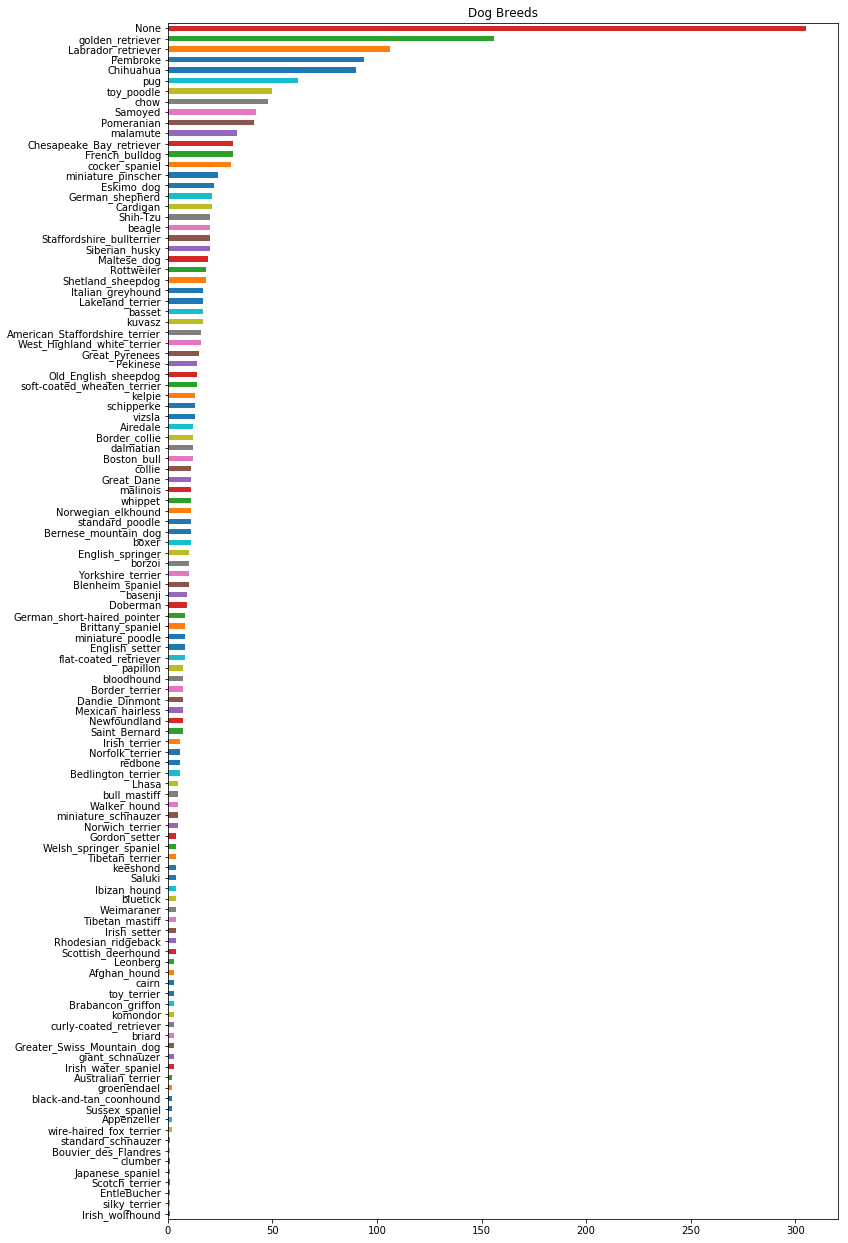

In [68]:
#A simple horizontal bar graph showing dog_breeds in descending order
df_archive_master['dog_breed'].value_counts(normalize=False, sort=True, ascending=True, bins=None, dropna=True).plot(kind='barh', title='Dog Breeds', figsize=(12,22))


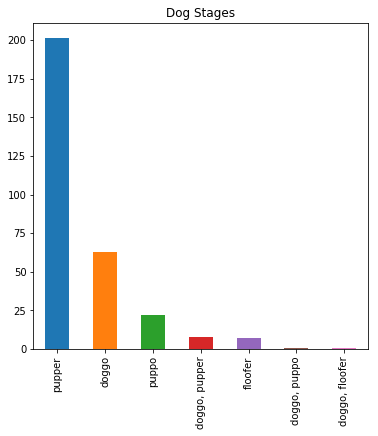

In [69]:
#A simple  bar graph showing dog stages. 
df_archive_master['dog_stages'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).plot(kind='bar', title='Dog Stages',figsize=(6,6))


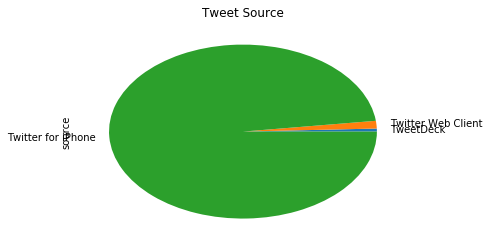

In [70]:
#A simple Pie chart showing tweet source
df_archive_master['source'].value_counts(normalize=False, sort=True, ascending=True, bins=None, dropna=True).plot(kind='pie',title='Tweet Source')


In [71]:
#function for two column historgram visualization
def two_col_hist(df, title, col1,col2,xlab,ylab, xlab2,ylab2):
    plt.hist(df[col1], 25, facecolor='b', alpha=1, label=xlab2);
    plt.hist(df[col2], 25, facecolor='r', alpha=1, label=ylab2);
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.grid(True)

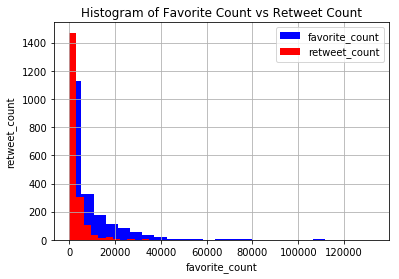

In [72]:
#A histogram of Favorite Count vs Retweet Count
two_col_hist(df_archive_master,'Histogram of Favorite Count vs Retweet Count','favorite_count','retweet_count','favorite_count','retweet_count', 'favorite_count','retweet_count')

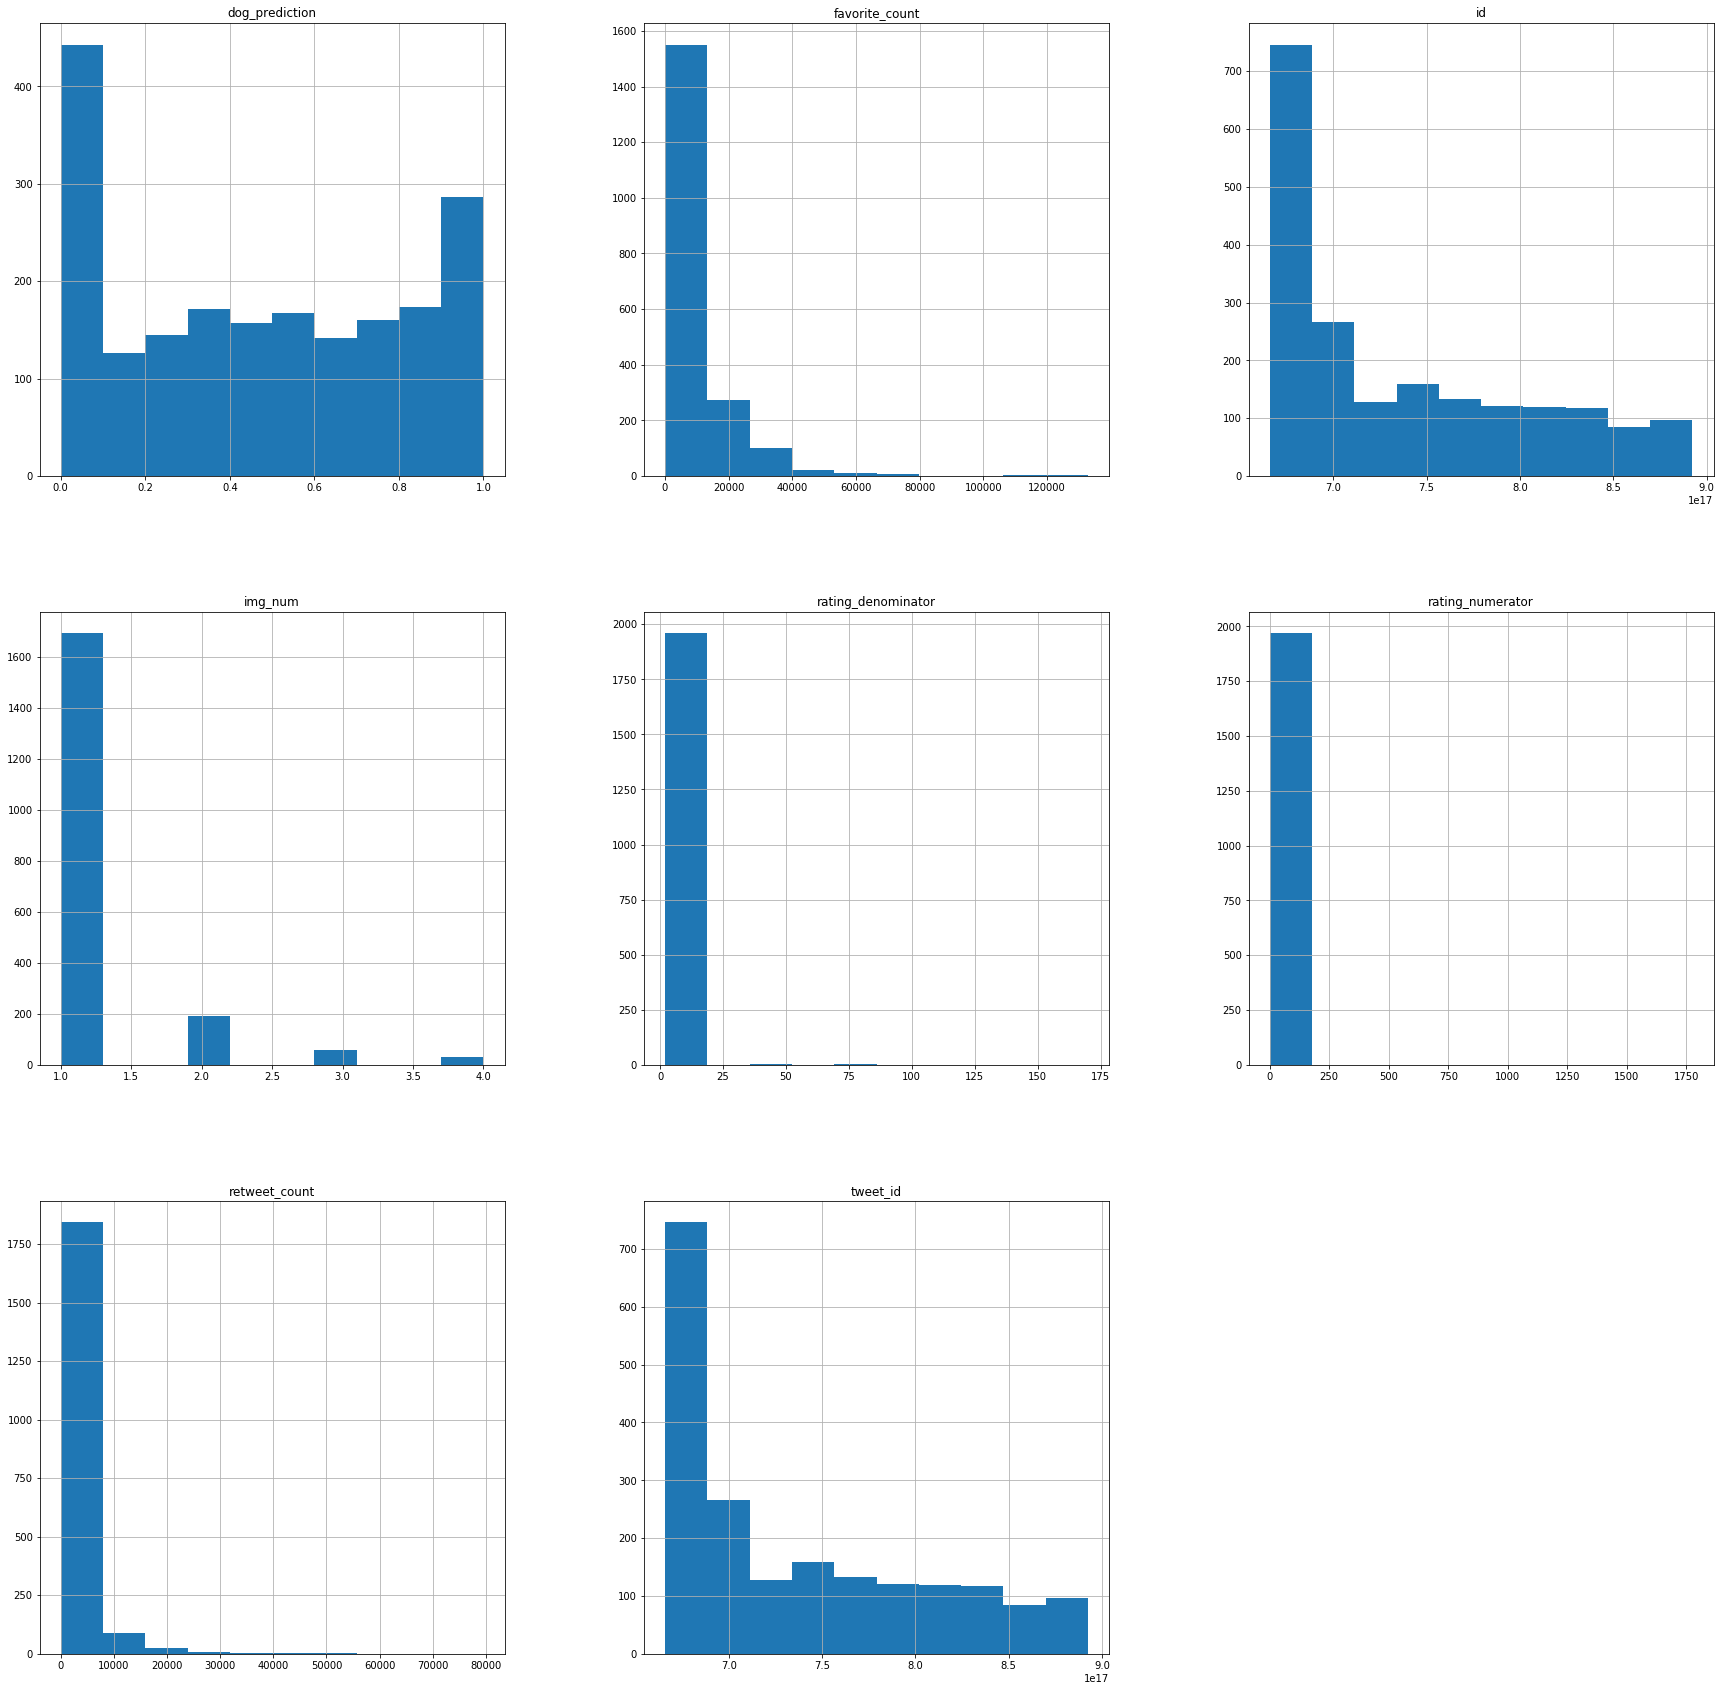

In [73]:
df_archive_master.hist(figsize=(30,30))
plt.show()

In [74]:
#Multiple-variable (2d) explorations
#we created a function to plot 2d variables
def twoDexplore_chart(dframe,x,y,title,xlab,ylab):
    sns.regplot(data=dframe,x=x,y=y)
    plt.title(title, fontsize=16)
    plt.ylabel(ylab,fontsize=16)
    plt.xlabel(xlab, fontsize=16)

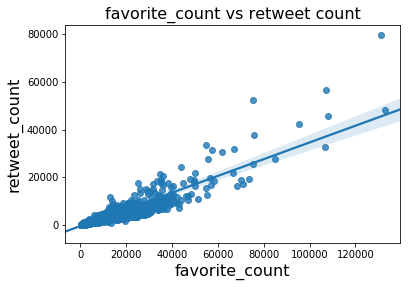

In [75]:
#calling our function to compare relationship between favorite_count, retweet_count
twoDexplore_chart(df_archive_master,'favorite_count','retweet_count','favorite_count vs retweet count','favorite_count','retweet_count')